<a href="https://colab.research.google.com/github/yash11103/AIML-course-/blob/main/ym_clickthroughratemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/sample_data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [7]:
df.sample(12)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
345,65.77,21,42162.90,218.61,Function-based fault-tolerant model,Contrerasshire,1,Eritrea,2016-03-18 17:35:40,0
382,77.66,29,67080.94,168.15,Operative scalable emulation,Reyesland,0,Gabon,2016-06-19 22:08:15,0
413,56.99,40,37713.23,108.15,Sharable optimal capacity,Brownton,0,Bahamas,2016-07-16 23:08:54,1
948,59.01,30,75265.96,178.75,Focused multimedia implementation,West Annefort,1,Philippines,2016-02-08 22:45:26,1
744,67.35,29,47510.42,118.69,Sharable secondary Graphical User Interface,East Heidi,0,Zimbabwe,2016-04-28 21:58:25,1
612,75.19,31,33502.57,245.76,Implemented discrete frame,Johnstonshire,1,Tajikistan,2016-06-16 18:04:51,0
14,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,2016-03-24 09:31:49,1
81,73.46,28,65653.47,222.75,Innovative executive encoding,West Joseph,1,Nicaragua,2016-05-15 14:41:49,0
317,73.38,25,53058.91,236.19,Horizontal transitional challenge,South Corey,1,French Southern Territories,2016-04-21 09:30:35,0
252,84.54,33,64902.47,204.02,Synchronized stable complexity,North Tracyport,1,Moldova,2016-03-02 10:07:43,0


In [8]:
a = df.shape
print(f'Rows: {a[0]}')
print(f'Columns: {a[1]}')

Rows: 1000
Columns: 10


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
import plotly.express as px

In [12]:
colList = df.columns
colList

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

Here "CLICKED ON AD" is the target column we need for training the model

In [13]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title =f'Box Plot of {x} column')
    fig.show()

In [14]:
outCols = ['Area Income']

In [15]:
for x in outCols:
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1

  LF = Q1 - (1.5*IQR)
  UF = Q3 + (1.5*IQR)

  # Keep the values in between UF and LF
  df = df[(df[x]>=LF) & (df[x]<=UF)]


In [16]:
for x in colList:
  if df[x].dtype != 'object':
    fig = px.box(df[x],title =f'Box Plot of {x} column')
    fig.show()

In [17]:
df.shape

(991, 10)

male ratio of ads clicked

<Axes: xlabel='Male', ylabel='Clicked on Ad'>

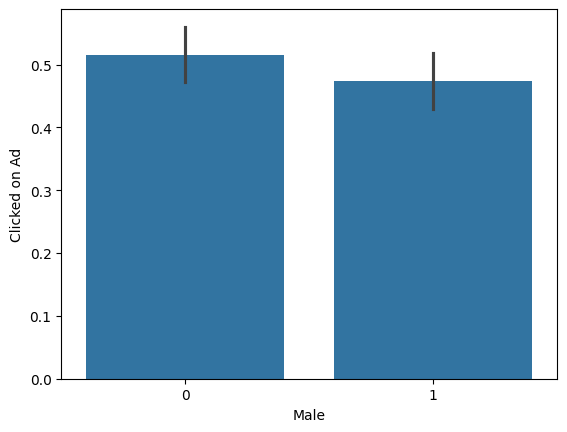

In [18]:
# checking male female click to ad ratio
sns.barplot(data=df, x='Male', y='Clicked on Ad')

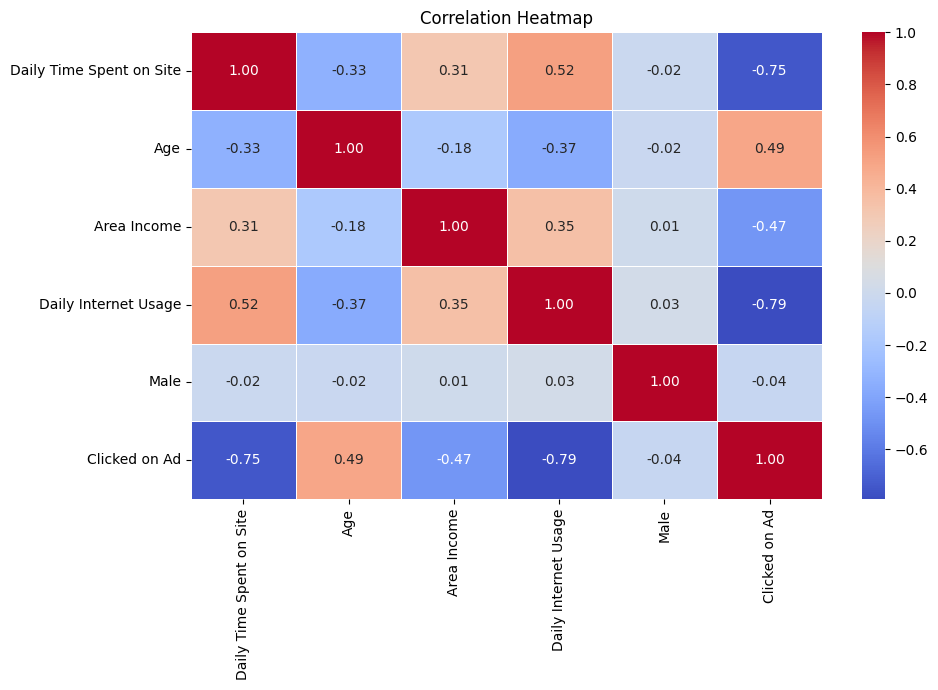

In [19]:
# print co-relation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

encoding and model building

In [20]:
catCol = []
for x in df.columns:
  if df[x].dtype =='object' and x !='Clicked on Ad':
    catCol.append(x)

In [21]:
catCol

['Ad Topic Line', 'City', 'Country', 'Timestamp']

In [22]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


Splitting the Data Into Dependent and Independent Columns

In [23]:
#we have excluded Ad Topic Line, city, country and timestamp from the model
x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [24]:
y

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


Train Test and Splitting the model


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train , x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state = 42)

In [27]:
x_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
945,89.80,36,57330.43,198.24,0
575,48.86,54,53188.69,134.46,0
933,36.73,34,46737.34,149.79,1
405,81.58,41,55479.62,248.16,0
529,89.37,34,42760.22,162.03,1
...,...,...,...,...,...
106,72.23,25,46557.92,241.03,1
271,73.04,37,73687.50,221.79,1
868,67.71,25,63430.33,225.76,1
437,76.24,27,63976.44,214.42,0


In [28]:
x_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
214,81.98,40,65461.92,229.22,0
332,56.30,49,67430.96,135.24,1
503,58.21,37,47575.44,105.94,0
310,76.56,34,70179.11,221.53,1
88,57.70,34,42696.67,109.07,0
...,...,...,...,...,...
430,88.72,32,43870.51,211.87,1
701,69.77,54,57667.99,132.27,0
989,70.96,31,55187.85,256.40,0
910,42.84,52,27073.27,182.20,1


implementing the model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [32]:
y_pred = model.predict(x_test)

In [33]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [34]:
y_test

,Clicked on Ad
214,0
332,1
503,1
310,0
88,1
...,...
430,0
701,1
989,0
910,1


Evaluation of model

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
accuracy_score(y_test,y_pred)
#the accuracy is 92% of model

0.9161073825503355

In [38]:
confusion_matrix(y_test,y_pred)

array([[147,   7],
       [ 18, 126]])

In [39]:
precision_score(y_test,y_pred)

0.9473684210526315

In [40]:
recall_score(y_test,y_pred)

0.875

In [41]:
f1_score(y_test,y_pred)

0.9097472924187726

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       154
           1       0.95      0.88      0.91       144

    accuracy                           0.92       298
   macro avg       0.92      0.91      0.92       298
weighted avg       0.92      0.92      0.92       298



sigmoid

In [43]:
def sigmoid(x):
  result = 1/(1+np.exp(-x))
  return result


In [44]:
sigmoid(-3)

np.float64(0.04742587317756678)

In [45]:
y_score = model.predict_proba(x_test)[:,1]

In [46]:
y_score

array([0.25419611, 0.99077623, 0.93558081, 0.09933892, 0.87919409,
       0.08330376, 0.25919932, 0.96525879, 0.97940763, 0.99419812,
       0.81531112, 0.60400308, 0.68773017, 0.92498036, 0.0806104 ,
       0.91609819, 0.14144452, 0.96656394, 0.89094092, 0.02744602,
       0.03912788, 0.12173996, 0.90589955, 0.0247218 , 0.10032282,
       0.84999426, 0.0437977 , 0.48063879, 0.0176114 , 0.11425941,
       0.0382482 , 0.31595371, 0.03298864, 0.96644968, 0.30267576,
       0.18165676, 0.01715058, 0.73183885, 0.01357671, 0.0175809 ,
       0.98019848, 0.13836928, 0.10560856, 0.02201569, 0.99727894,
       0.13164853, 0.77422868, 0.55033886, 0.03182994, 0.98675892,
       0.07637647, 0.17395609, 0.05426577, 0.04837484, 0.25634949,
       0.9085192 , 0.97820189, 0.62170756, 0.02862207, 0.90623548,
       0.9673906 , 0.16238591, 0.99903827, 0.92084928, 0.98142262,
       0.96539523, 0.3751673 , 0.87989954, 0.01649758, 0.95516728,
       0.74366815, 0.59465915, 0.14847572, 0.95667435, 0.55351

In [47]:
len(y_score)

298

In [48]:
sorInd = np.argmax(y_score)
sorInd

np.int64(289)

In [49]:
y_score[sorInd]

np.float64(0.99940333943832)

In [50]:
sortLabel = y_test.iloc[sorInd]
sortLabel

np.int64(1)

In [51]:
sortScore = y_score[sorInd]
sortScore

np.float64(0.99940333943832)

In [52]:
x_values = np.linspace(-10,10,100)
y_sigmoid = sigmoid(x_values)

In [53]:
y_sigmoid

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

In [54]:
y_score

array([0.25419611, 0.99077623, 0.93558081, 0.09933892, 0.87919409,
       0.08330376, 0.25919932, 0.96525879, 0.97940763, 0.99419812,
       0.81531112, 0.60400308, 0.68773017, 0.92498036, 0.0806104 ,
       0.91609819, 0.14144452, 0.96656394, 0.89094092, 0.02744602,
       0.03912788, 0.12173996, 0.90589955, 0.0247218 , 0.10032282,
       0.84999426, 0.0437977 , 0.48063879, 0.0176114 , 0.11425941,
       0.0382482 , 0.31595371, 0.03298864, 0.96644968, 0.30267576,
       0.18165676, 0.01715058, 0.73183885, 0.01357671, 0.0175809 ,
       0.98019848, 0.13836928, 0.10560856, 0.02201569, 0.99727894,
       0.13164853, 0.77422868, 0.55033886, 0.03182994, 0.98675892,
       0.07637647, 0.17395609, 0.05426577, 0.04837484, 0.25634949,
       0.9085192 , 0.97820189, 0.62170756, 0.02862207, 0.90623548,
       0.9673906 , 0.16238591, 0.99903827, 0.92084928, 0.98142262,
       0.96539523, 0.3751673 , 0.87989954, 0.01649758, 0.95516728,
       0.74366815, 0.59465915, 0.14847572, 0.95667435, 0.55351

In [55]:
ind = np.where(y_test)

In [56]:
ind


(array([  1,   2,   4,   6,   7,   8,   9,  10,  12,  13,  15,  17,  18,
         22,  27,  31,  33,  37,  40,  44,  47,  49,  54,  55,  56,  57,
         59,  60,  61,  62,  63,  64,  65,  67,  69,  70,  71,  73,  75,
         81,  84,  85,  87,  92,  94,  98, 100, 104, 105, 106, 107, 108,
        111, 113, 114, 115, 118, 122, 123, 125, 126, 128, 129, 131, 132,
        133, 138, 139, 141, 146, 147, 150, 151, 152, 155, 156, 158, 159,
        160, 169, 170, 171, 172, 173, 177, 179, 181, 184, 185, 186, 187,
        188, 190, 191, 196, 197, 199, 201, 203, 204, 205, 208, 209, 212,
        214, 215, 217, 219, 226, 227, 228, 229, 230, 231, 237, 238, 240,
        243, 246, 247, 249, 251, 253, 256, 261, 262, 263, 264, 265, 269,
        272, 273, 274, 279, 281, 282, 284, 285, 287, 289, 290, 291, 294,
        296]),)

In [57]:
sortLabel = y_test.iloc[:]
sortLabel

,Clicked on Ad
214,0
332,1
503,1
310,0
88,1
...,...
430,0
701,1
989,0
910,1


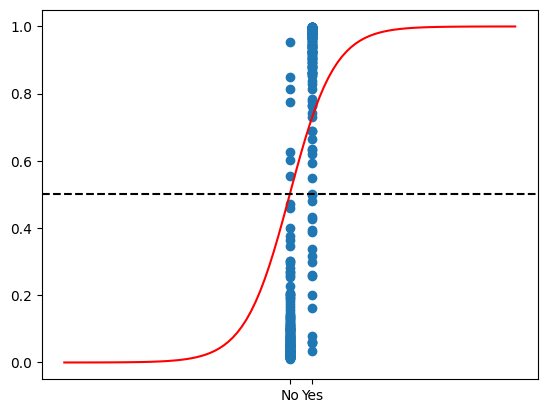

In [58]:
plt.plot(x_values,y_sigmoid,color='red')
plt.axhline(y=0.5, color ='black',linestyle='--')
plt.xticks([0, 1], ['No', 'Yes'])
plt.scatter(sortLabel,y_score)
plt.show()